<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/staff_encoded.csv .


In [104]:
import pandas as pd
staff = pd.read_csv('staff_encoded.csv', sep=';')

This is the data we have generated in previous notebooks and the one we are going to be using for the machine learning algorithms

In [105]:
staff.head(50)

,Unnamed: 0,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,wk_position_encoded,Tipo_trab_reduced,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
0,0,25249.00,42484.00,1419.3,830.1,1,Material Handler,Entre 30-50,Leve,Mantenimiento,1,1,0,0,1,0,0,415,ETT,0,1,0,0
1,1,25249.00,42484.00,1419.3,830.1,1,customer,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,695,Indefinido,0,0,1,0
2,2,25684.50,18302.30,1150.6,151.5,1,Vaciado contenedores de chatarra,Entre 30-50,Muy grave,Mantenimiento,1,0,0,1,1,0,0,659,Duración Determinada,1,0,0,0
3,3,25684.50,18302.30,1150.6,151.5,1,Pontonero,Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,537,ETT,0,1,0,0
4,4,0.00,167848.00,1300.5,101.5,1,Longi 2,Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,320,Otros,0,0,0,1
5,5,25684.50,18302.30,1150.6,151.5,1,Operator / Stacker Operator,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,519,Indefinido,0,0,1,0
6,6,0.00,0.00,606.5,0.0,1,Slitter Op,Entre 30-50,Grave,Mantenimiento,1,0,0,1,1,0,0,582,Otros,0,0,0,1
7,7,0.00,0.00,606.5,0.0,1,Gantry crane operator,Mayor 50,Muy grave,Mantenimiento,1,0,0,1,0,1,0,223,Indefinido,0,0,1,0
8,8,0.00,0.00,606.5,0.0,1,Verpackerin,Mayor 50,Muy grave,Mantenimiento,1,0,0,1,0,1,0,673,Otros,0,0,0,1
9,9,25249.00,42484.00,1419.3,830.1,1,assistant of operator,Entre 30-50,Leve,Mantenimiento,1,1,0,0,1,0,0,685,Otros,0,0,0,1


In [106]:
staff.describe()

,Unnamed: 0,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,wk_position_encoded,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
count,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000
mean,10604.500000,11954.424226,51016.048951,952.052207,210.247864,0.197077,0.913626,0.377982,0.295568,0.326450,0.482791,0.310938,0.206271,398.057520,0.099387,0.117209,0.239934,0.543470
std,6122.943941,17212.307917,64235.344463,512.418590,324.615053,0.397800,0.280923,0.484895,0.456308,0.468925,0.499716,0.462888,0.404637,227.836421,0.299188,0.321677,0.427053,0.498119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5302.250000,0.000000,211.000000,606.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,202.000000,0.000000,0.000000,0.000000,0.000000
50%,10604.500000,0.000000,29316.000000,1212.500000,56.300000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,398.000000,0.000000,0.000000,0.000000,1.000000
75%,15906.750000,25249.000000,42484.000000,1419.300000,151.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,595.000000,0.000000,0.000000,0.000000,1.000000
max,21209.000000,72495.200000,167848.000000,1542.900000,830.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,790.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
ceros = staff[staff['Accident'] == 0]['Accident'].count()
unos = staff[staff['Accident'] == 1]['Accident'].count()

print('No',ceros, 'Yes', unos) ## Here we can check that we have an unbalanced dataset as we have many more employees who didnt have an accident

No 17030 Yes 4180


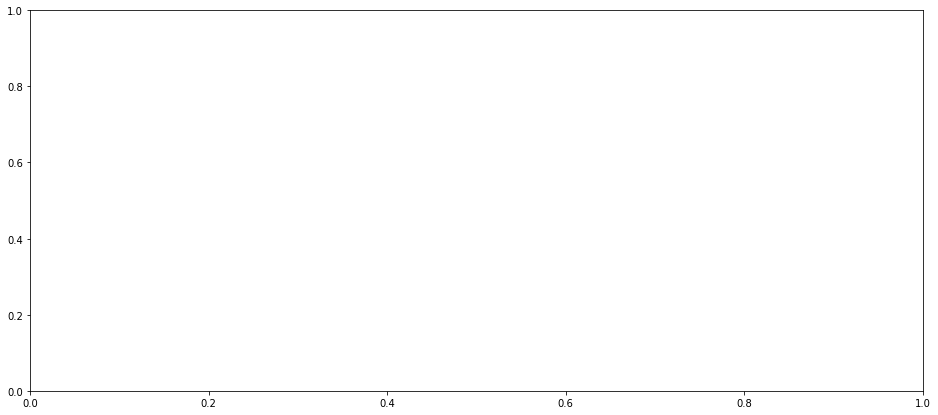

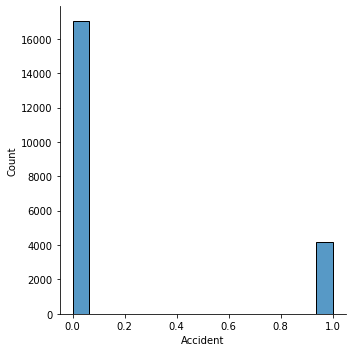

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
y = staff['Accident']
fig, ax = plt.subplots(figsize=(16,7))
sns.displot(y)



### Linear Regression model

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30', 'wk_position_encoded',
        'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros']]

In [110]:
y = staff['Accident']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
len(X_test)

7000

In [113]:
y_train = y_train.apply(str)

y_test = y_test.apply(str)

In [114]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



Coefficients: 
 [-2.67633360e-06 -1.55970510e-06  6.82094449e-05  1.48323767e-04
  1.49918014e-01  8.82977728e-02 -9.91705566e-02  1.08727839e-02
 -1.72735700e-02  2.28085952e-02 -5.53502523e-03 -9.56767296e-06
 -9.23427080e-02  4.28898092e-02  6.05052243e-02 -1.10523254e-02]
Mean squared error: 0.14
Coefficient of determination: 0.12


# Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import numpy as np
# we are going to import this function from Scikit learn to plot the confussion matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color= "black")
    fig.tight_layout()
    return ax

In [117]:
clf = LogisticRegression()

In [118]:
y_train = y_train.apply(str).replace('1', 'Yes').replace('0', 'No')

y_test = y_test.apply(str).replace('1', 'Yes').replace('0', 'No')

In [119]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix, without normalization
[[5635    0]
 [1365    0]]


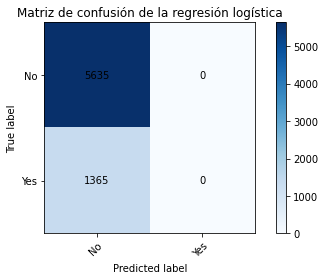

In [120]:
y_pred_log_reg=clf.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred_log_reg, classes=classes, title='Matriz de confusión de la regresión logística')

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [122]:
print (classification_report(y_test, y_pred_log_reg, target_names=classes))
print (accuracy_score(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5635
         Yes       0.00      0.00      0.00      1365

    accuracy                           0.81      7000
   macro avg       0.40      0.50      0.45      7000
weighted avg       0.65      0.81      0.72      7000

0.805


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K Nearest Neighbors

In [123]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier



In [124]:
model = KNeighborsClassifier(n_neighbors=8)
model = model.fit(X_train, y_train)

In [125]:
std_score = model.score(X_test, y_test)
std_score ##this is a very good accuracy of the model

0.8028571428571428

In [126]:
y_pred = model.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.96      0.89      5635
         Yes       0.48      0.14      0.22      1365

    accuracy                           0.80      7000
   macro avg       0.65      0.55      0.55      7000
weighted avg       0.76      0.80      0.76      7000



## Decision Tree

In [128]:
## check la distribucion de datos de una columna del dataset

import seaborn as sns


In [129]:
y_train = y_train.apply(str).replace('1', 'Yes').replace('0', 'No')

y_test = y_test.apply(str).replace('1', 'Yes').replace('0', 'No')


In [130]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)

In [131]:
model.fit(X_train, y_train) ## we are going to start without giving any weight to the classes class_weight but then we will try to assign the correspondent weight

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [132]:
y_pred = model.predict(X_test)

In [133]:
comp = pd.DataFrame({'real': y_test, 'preds':y_pred})
comp.head(10) ## parece que esta acertando debido al desbalanceo vamos analizar los casos que deberian de ser 1

,real,preds
16651,No,No
13898,No,No
16269,No,No
7306,No,No
13631,No,No
4609,No,Yes
18063,No,No
408,Yes,No
12181,No,No
3062,Yes,Yes


In [134]:
comp[comp['real']=='Yes'] ##casi siempre esta prediciendo 0 para los casos de 1

,real,preds
408,Yes,No
3062,Yes,Yes
936,Yes,No
44,Yes,Yes
447,Yes,Yes
...,...,...
1246,Yes,No
800,Yes,No
2074,Yes,No
1483,Yes,No


In [135]:
## lets check the percentge of accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc ## this accuracy is good but our problem is that it is very import to us to identify those cases with an accident so we need to better up our prediction on those

0.7642857142857142

In [136]:
len(y_test[y_test=='Yes'])

1365

Confusion matrix, without normalization
[[4821  814]
 [ 836  529]]


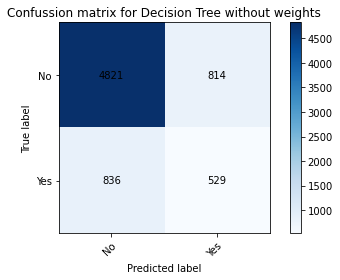

In [137]:
classes = ['No', 'Yes']

plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree without weights')

Here we are going to perform a GridSearchCV to find th best hiperparameters for our dataset.

In [138]:
from sklearn.model_selection import GridSearchCV

clf_dt = GridSearchCV(DecisionTreeClassifier(),
                      param_grid={"min_samples_leaf":np.arange(1,100),
                                 'max_depth': np.arange(2, 20)},
                     cv = 10,
                     scoring = "accuracy")

In [142]:
clf_dt.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12

In [143]:
clf_dt.best_score_


0.8294159042927515

In [144]:
clf_dt.best_params_

{'max_depth': 9, 'min_samples_leaf': 30}

Now we are going to  run the model again but with the class weights according to the frequency of the classes to try to balance them and achieve better results

In [145]:
## lets check frequencies
staff['Accident'] = staff['Accident'].apply(str).apply(lambda x: x.replace('1', 'Yes').replace('0', 'No'))
counts = staff['Accident'].replace('1', 'Yes').replace('0','No').astype(str).value_counts().to_dict()
print(counts)



{'No': 17030, 'Yes': 4180}


In [146]:

model = DecisionTreeClassifier(random_state=1, class_weight =counts, max_depth= 9, min_samples_leaf = 30)
model.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight={'No': 17030, 'Yes': 4180},
                       criterion='gini', max_depth=9, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [147]:
y_pred = model.predict(X_test)
comp_2 = pd.DataFrame({'real': y_test, 'preds':y_pred})
comp_2[comp_2['real']=='Yes'] ## it seems it has increase accuracy, lets check

,real,preds
408,Yes,No
3062,Yes,No
936,Yes,No
44,Yes,No
447,Yes,No
...,...,...
1246,Yes,No
800,Yes,No
2074,Yes,No
1483,Yes,No


In [148]:
acc = accuracy_score(y_test, y_pred)
acc 

0.805

In [149]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5635,    0],
       [1365,    0]])

If we add the best parameter the accuracy is increasing bt because it is never predicting value 'yes' so it is not working correctly

Confusion matrix, without normalization
[[5635    0]
 [1365    0]]


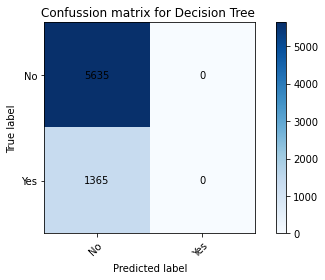

In [150]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [151]:
##lets try without them

model = DecisionTreeClassifier()
model = DecisionTreeClassifier(random_state=1, class_weight =counts)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={'No': 17030, 'Yes': 4180},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [152]:
y_pred = model.predict(X_test)


Confusion matrix, without normalization
[[4784  851]
 [ 812  553]]


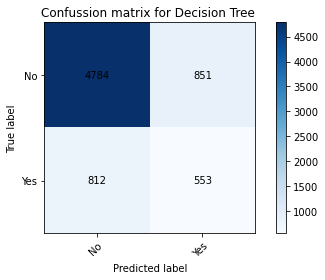

In [153]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [154]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

scores = cross_validate(model, X_test, y_test, scoring ='f1_macro')

In [155]:
scores ## if we look at the test_score it is around .6 which is bad

{'fit_time': array([0.02998853, 0.02827668, 0.03145695, 0.02749729, 0.02683353]),
 'score_time': array([0.01101613, 0.01076245, 0.01039648, 0.01085091, 0.01015973]),
 'test_score': array([0.59631006, 0.62453935, 0.6324076 , 0.60321292, 0.61689319])}

Now we are going to try to over sample our minority class to balance our classes and achieve better results

In [156]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [157]:
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [158]:
from collections import Counter

counter = Counter(y)

for k, v in counter.items():
  dist = v / len(y)* 100
  print(f'Class={k}, n={v}, ({dist}%)')

Class=1, n=17030, (50.0%)
Class=0, n=17030, (50.0%)


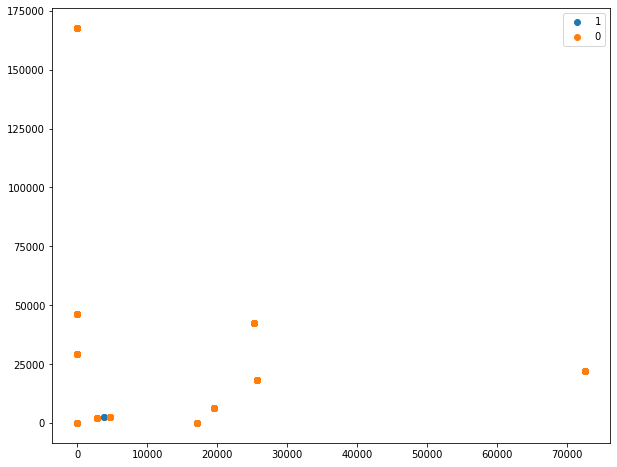

In [159]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10,8))

for label, _ in counter.items():
  row = np.where(y==label)[0]
  plt.scatter(X[row, 0], X[row, 1], label=str(label))


plt.legend()

In [160]:
## we are going to run the model again with this oversample data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
model = DecisionTreeClassifier()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion matrix, without normalization
[[4739  881]
 [ 829 4791]]


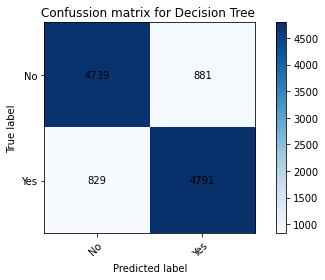

In [162]:
y_pred = model.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [163]:
scores = cross_validate(model, X_test, y_test, scoring ='f1_macro')
scores ## our model has increased positively its test score with going around now a .8 which is a good result

{'fit_time': array([0.03147006, 0.02995229, 0.03190494, 0.02834392, 0.02799439]),
 'score_time': array([0.00231409, 0.00221992, 0.00234699, 0.0022397 , 0.00221372]),
 'test_score': array([0.82828081, 0.82606758, 0.83936446, 0.83362515, 0.83318106])}

# Random Forest Algorithm

We are going to perform this algorithm with the balanced data we have generated before, so we are going to be using same partitions

In [164]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
model.score(X_test, y_test) 

0.8545373665480427

In [166]:
y_predicted = model.predict(X_test)

Confusion matrix, without normalization
[[4784  836]
 [ 799 4821]]


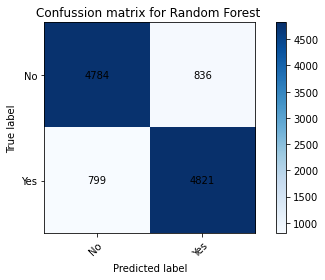

In [167]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_predicted, classes=classes, title='Confussion matrix for Random Forest ')

### hyperparameter optimization

Now we are going to apply a GridSearch CV to try maximize performance in our algorithm and be able to apply the hiperparamethers that best fits our model

In [168]:
param_grid={"min_samples_leaf": [1,20], #min number of samples required at each leaf code
            'n_estimators': [int(x) for x in np.linspace(start=10, stop=80, num=10)], # number of trees in random forest
            'max_depth': np.arange(2,10), #number of levels in the tree
            'min_samples_split': [2,5]} # min number of samples required to split a node 

In [169]:
from sklearn.model_selection import GridSearchCV

clf_rt = GridSearchCV(RandomForestClassifier(),
                      param_grid=param_grid,cv = 3,scoring = "accuracy",n_jobs = 4, verbose = 2)

In [170]:
clf_rt.fit(X, y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   49.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  7.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [171]:
clf_rt.best_score_

0.8247260399858511

In [172]:
clf_rt.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [173]:
clf_rf_good = clf_rt.best_estimator_


By the feature importances method we can observe how each variable impacts the decisions taken by the random forest

In [174]:
clf_rf_good.feature_importances_


array([0.01438858, 0.10110682, 0.04017291, 0.02663165, 0.0233965 ,
       0.19855675, 0.17543648, 0.09685712, 0.06717627, 0.03827224,
       0.01312746, 0.0052428 , 0.02570016, 0.01945657, 0.09786419,
       0.0566135 ])

Now we are going to run the algorithm with the best parameter we got from the GridSearchCV

In [175]:
model = RandomForestClassifier(max_depth= 9 , min_samples_leaf= 1, min_samples_split= 2, n_estimators= 64)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
model.score(X_test, y_test) ## with the best parameters from the GridSearchCV we only got a increment from 0.85 to 0.86

0.8712633451957296

In [177]:
y_predicted = model.predict(X_test)

Confusion matrix, without normalization
[[5076  544]
 [ 903 4717]]


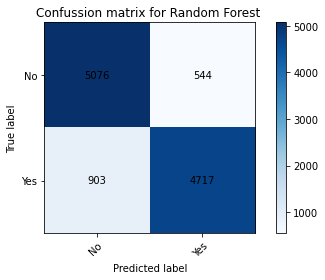

In [178]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_predicted, classes=classes, title='Confussion matrix for Random Forest ')

### Ploting the learning curve from the Random Forest

The learning curve visualize the effect of the number of observatiosn on the performance metric

In [179]:
from sklearn.model_selection import learning_curve



In [180]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv = 3, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy', verbose=1)

[learning_curve] Training set sizes: [ 2270  7379 12488 17597 22706]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   21.8s finished


In [181]:
import numpy as np

train_mean = np.mean(train_scores, axis = 1)
train_mean

array([1.        , 0.99530198, 0.99228593, 0.99240401, 0.99414252])

In [182]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.        , 0.00332384, 0.00539963, 0.00515316, 0.0038818 ])

In [183]:
test_mean = np.mean (test_scores, axis = 1)
test_mean

array([0.5       , 0.70573123, 0.78552998, 0.83206525, 0.83875892])

In [184]:
test_std = np.std(test_scores, axis = 1)

test_std

array([3.59595077e-05, 1.45474233e-01, 1.06867124e-01, 1.00660184e-01,
       9.11951662e-02])

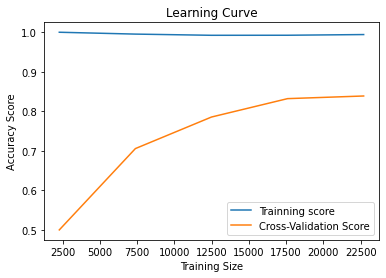

In [185]:
plt.plot(train_sizes, train_mean, label = 'Trainning score') #train accuracy
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score') #training accuracy

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

# XGBoost

Now we are going to check the XGBoost algorithm efficacy

In [186]:
from xgboost import XGBClassifier


In [205]:
param_grid={'max_depth': np.arange(2,10),
             "learning_rate": [0.05],
              "n_estimators": np.arange(100, 150, 10)}

In [206]:

clf_xg = GridSearchCV(XGBClassifier(),
                      param_grid = param_grid ,
                      cv = 4,
                      scoring = 'accuracy', verbose = 2,
                      n_jobs = -1
         )

In [207]:
clf_xg.fit(X_train, y_train)


Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 110, 

In [208]:
clf_xg.best_params_


{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 130}

In [209]:
clf_xg.best_score_


0.8797984224364592

Confusion matrix, without normalization
[[4739  881]
 [ 829 4791]]


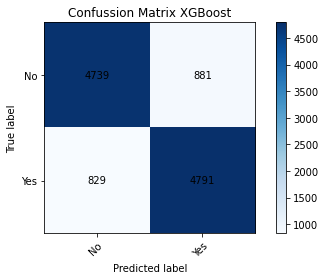

In [211]:

clf_xgb_test = XGBClassifier(learning_rate = 0.05, max_depth = 9, n_estimators = 130)
clf_xgb_test.fit(X_train, y_train)
y_pred_xgb=clf_xgb_test.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion Matrix XGBoost')

In [212]:
print (classification_report(y_test, y_pred, target_names=classes))
print (accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.84      0.85      5620
         Yes       0.84      0.85      0.85      5620

    accuracy                           0.85     11240
   macro avg       0.85      0.85      0.85     11240
weighted avg       0.85      0.85      0.85     11240

0.847864768683274


# SVM : Support Vector Machine 

In [214]:
from sklearn.svm import SVC

clf_svml = GridSearchCV(SVC(kernel="linear",),
                  param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']},
                  refit = True, verbose=2)

In [ ]:
clf_svml.fit(X_train, y_train)